In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from hyperspace.kepler.plots import plot_convergence
from hyperspace.kepler.data_utils import load_results

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')


%matplotlib inline

**The plotting functions need to have access to the objective function that was minimized. Let's bring that back into view:**

In [3]:
def objective(params):
    """
    Objective function to be minimized.

    Parameters
    ----------
    * params [list, len(params)=n_hyperparameters]
        Settings of each hyperparameter for a given optimization iteration.
        - Controlled by hyperspaces's hyperdrive function.
        - Order preserved from list passed to hyperdrive's hyperparameters argument.
     """
    C, epsilon = params

    reg.set_params(C=C, epsilon=epsilon)

    return -np.mean(cross_val_score(reg, X, y, cv=9, n_jobs=-1, scoring="neg_mean_squared_error"))

# Target: Sugar

In [4]:
results_sugar = load_results("/Users/karahbit/FastFingerPrinting/phase1/src/galloOSIOPT/hyperparams-opt/results/Neospectra/space2/Sugar", sort=True)

best_sugar = results_sugar.pop(0)

In [5]:
# Get the hyperparameter values
C = best_sugar.x[0]
epsilon = best_sugar.x[1]
print("Hyperparameters of our best model for the target 'Sugar':\n {}".format(best_sugar.x))

Hyperparameters of our best model for the target 'Sugar':
 [992.8938140830869, 0.06469835890838599]


**Retraining the SVR model with Optimal Hyperparameters**

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

import numpy as np
import data_utils as du

dataset = du.load_data()
reg = SVR(kernel='rbf')

In [7]:
X, y = dataset[0], dataset[1]

reg.set_params(C=C, epsilon=epsilon)

final_results_sugar = -np.mean(cross_val_score(reg, X, y, cv=9, n_jobs=1, scoring="neg_mean_squared_error")) #use n_jobs=1 if -1 does not work
print('Negative Mean Squared Error with optimal hyperparameters for the target Sugar: {}'.format(final_results_sugar))

Negative Mean Squared Error with optimal hyperparameters for the target Sugar: 0.09549323634625953


**Finally, let's plot the convergence of the "objective" as a function of the number of iterations.**

**The traces, in this case, the top 4, show the optimization progress at each rank as we run 100 iterations of Bayesian SMBO in parallel. The red trace shows the best performing rank. Each data point represents the function value found at each iteration of the optimization, while the last data point represents the global minimum found.**

**Remember, our objective function here is to minimize the negative cross validation score of our model over 9 folds of the data. The scoring metric used for the cross-validation will be the negative mean absolute error.**

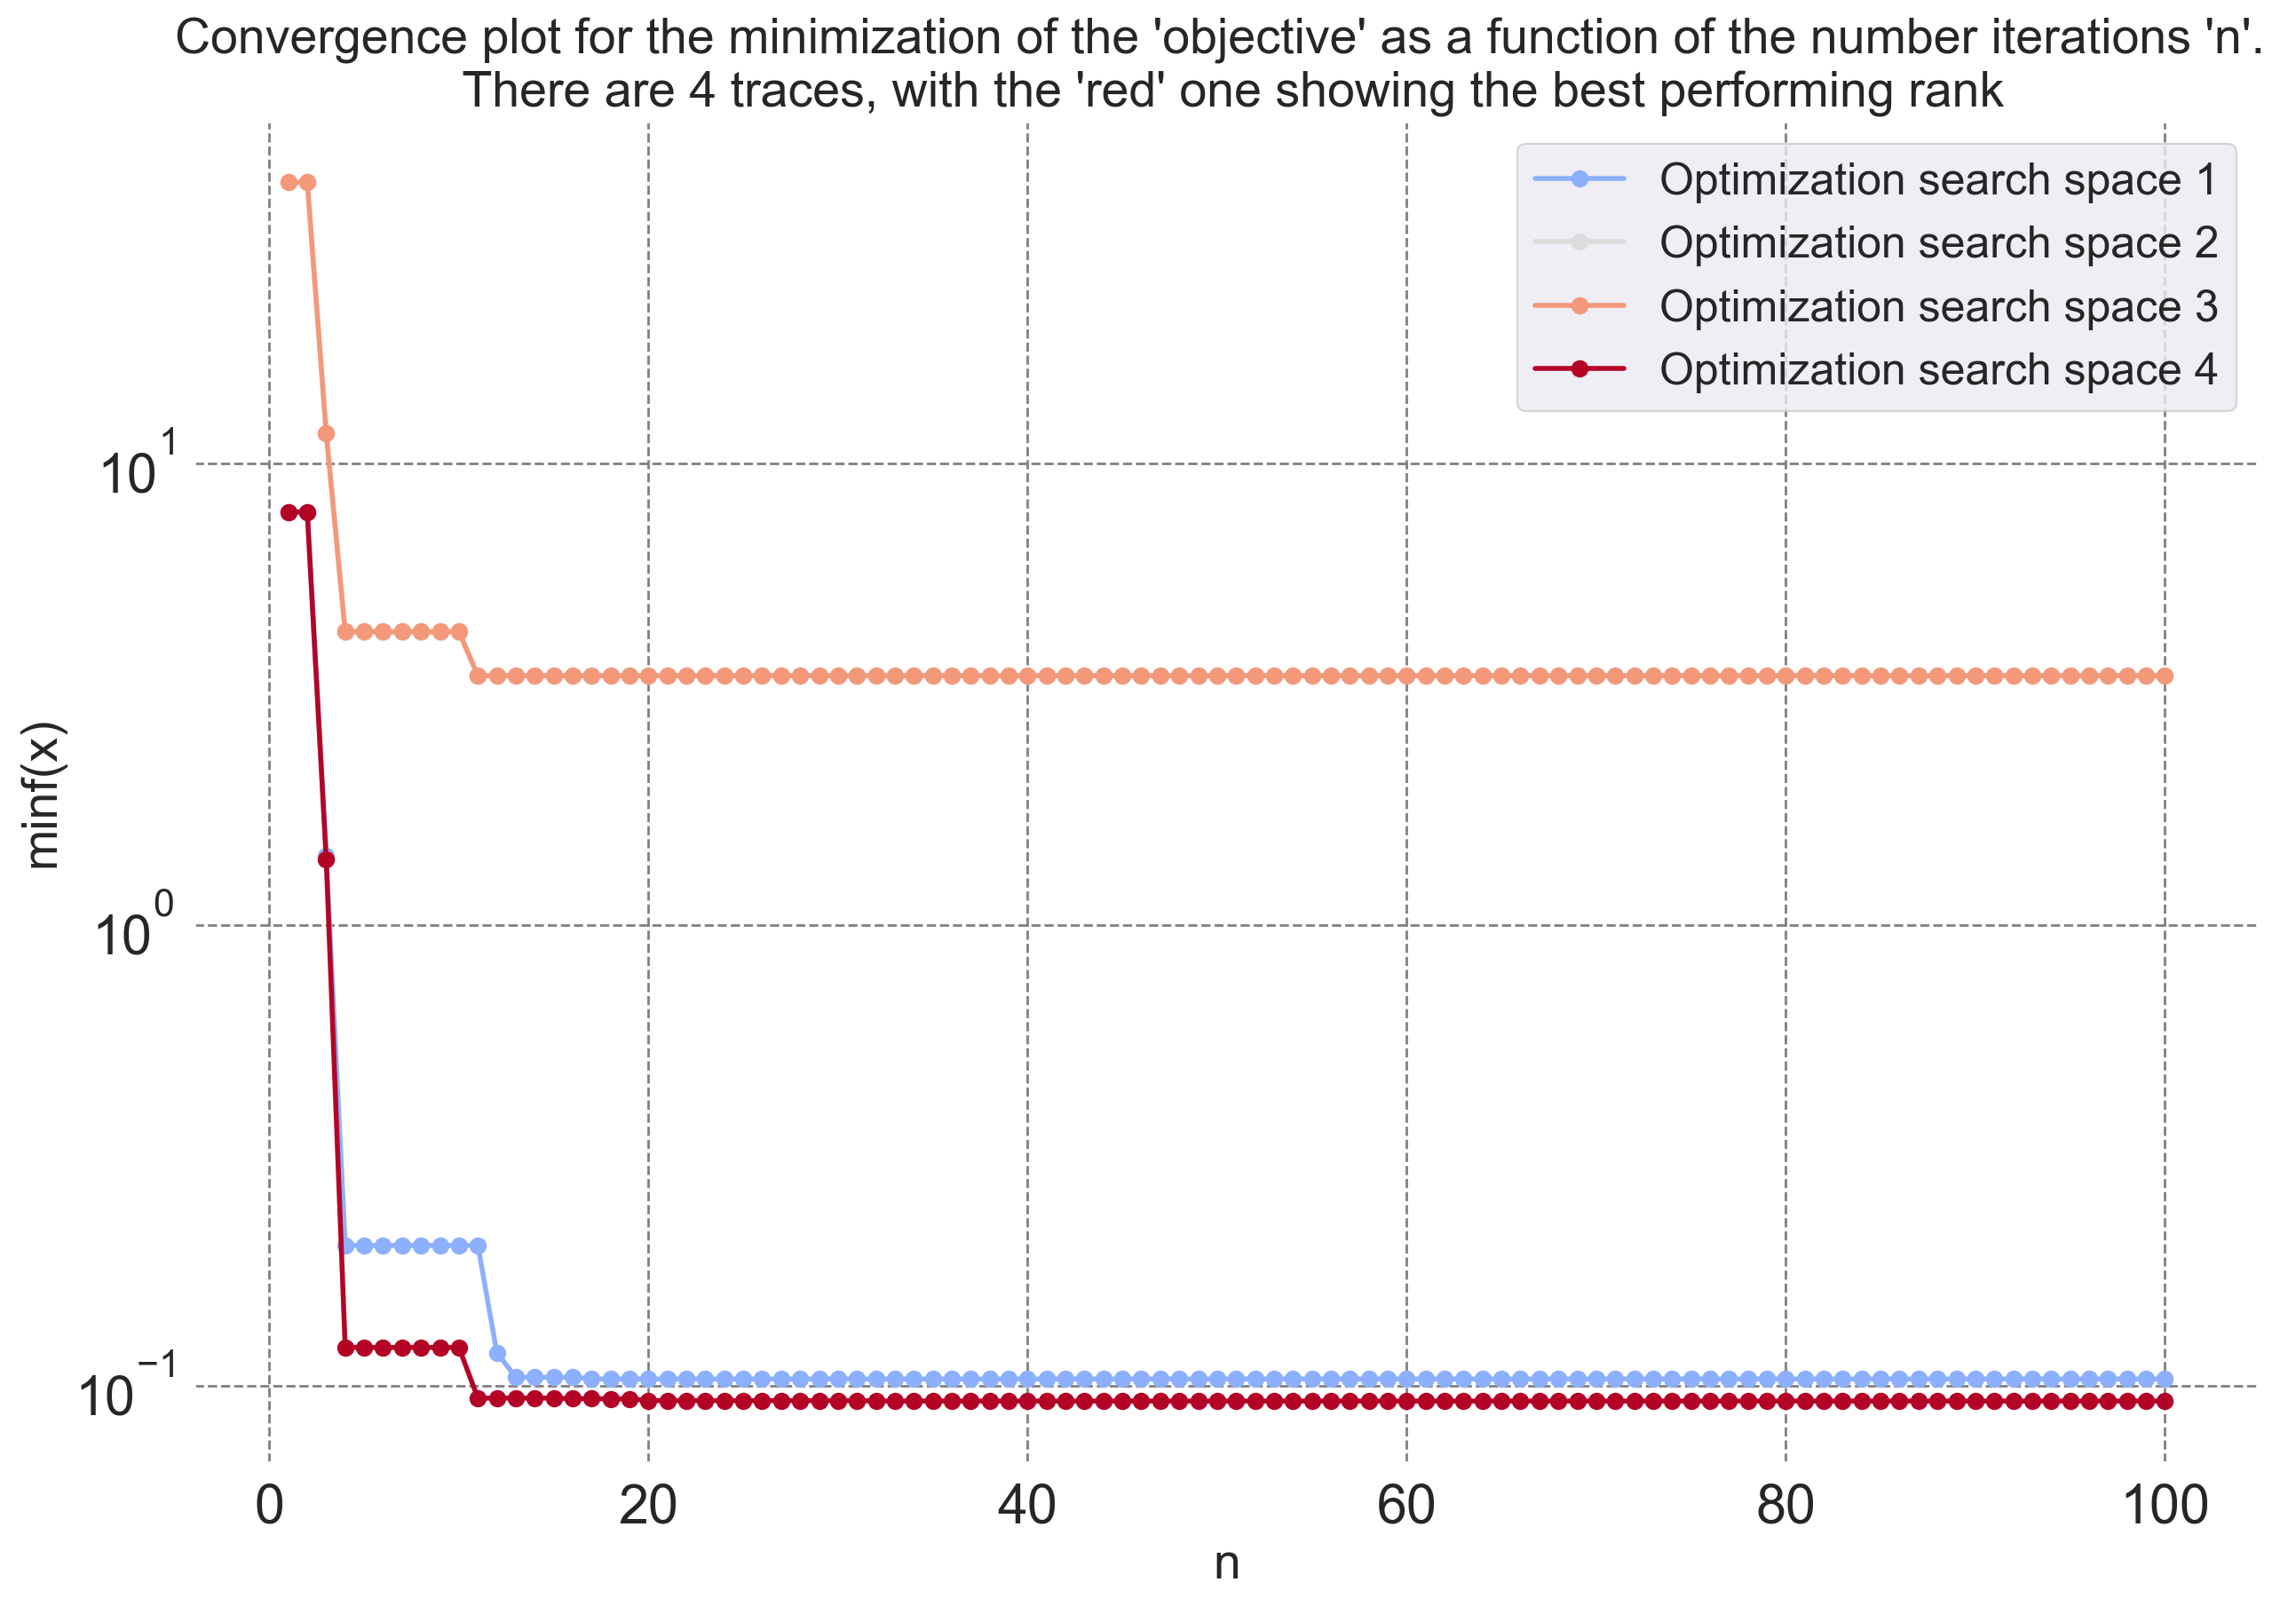

In [8]:
fig, ax = plot_convergence(results_sugar[0], results_sugar[1], results_sugar[2], best_sugar)
ax.set_facecolor('white')
ax.set_title("Convergence plot for the minimization of the 'objective' as a function of the number iterations 'n'. \n There are 4 traces, with the 'red' one showing the best performing rank", loc='center', fontsize=20)
ax.set_xlabel("n", fontsize=20)
ax.set_ylabel("minf(x)", fontsize=20)
ax.set_yscale("log")
ax.grid(True, color='grey', linestyle='--', linewidth=1)
ax.legend(['Optimization search space 1', 'Optimization search space 2', 'Optimization search space 3', 'Optimization search space 4'], prop={'size': 18})

# Target: Alcohol

In [9]:
results_alcohol = load_results("/Users/karahbit/FastFingerPrinting/phase1/src/galloOSIOPT/hyperparams-opt/results/Neospectra/space2/Alcohol", sort=True)

best_alcohol = results_alcohol.pop(0)

In [10]:
# Get the hyperparameter values
C = best_alcohol.x[0]
epsilon = best_alcohol.x[1]
print("Hyperparameters of our best model for the target 'Alcohol':\n {}".format(best_alcohol.x))

Hyperparameters of our best model for the target 'Alcohol':
 [1000.0, 0.3503955635803355]


**Retraining the SVR model with Optimal Hyperparameters**

In [11]:
X, y = dataset[2], dataset[3]

reg.set_params(C=C, epsilon=epsilon)

final_results_alcohol = -np.mean(cross_val_score(reg, X, y, cv=9, n_jobs=1, scoring="neg_mean_squared_error")) #use n_jobs=1 if -1 does not work
print('Negative Mean Squared Error with optimal hyperparameters for the target Alcohol: {}'.format(final_results_alcohol))

Negative Mean Squared Error with optimal hyperparameters for the target Alcohol: 0.24877565819578112


**Finally, let's plot the convergence of the "objective" as a function of the number of iterations.**

**The traces, in this case, the top 4, show the optimization progress at each rank as we run 100 iterations of Bayesian SMBO in parallel. The red trace shows the best performing rank. Each data point represents the function value found at each iteration of the optimization, while the last data point represents the global minimum found.**

**Remember, our objective function here is to minimize the negative cross validation score of our model over 9 folds of the data. The scoring metric used for the cross-validation will be the negative mean absolute error.**

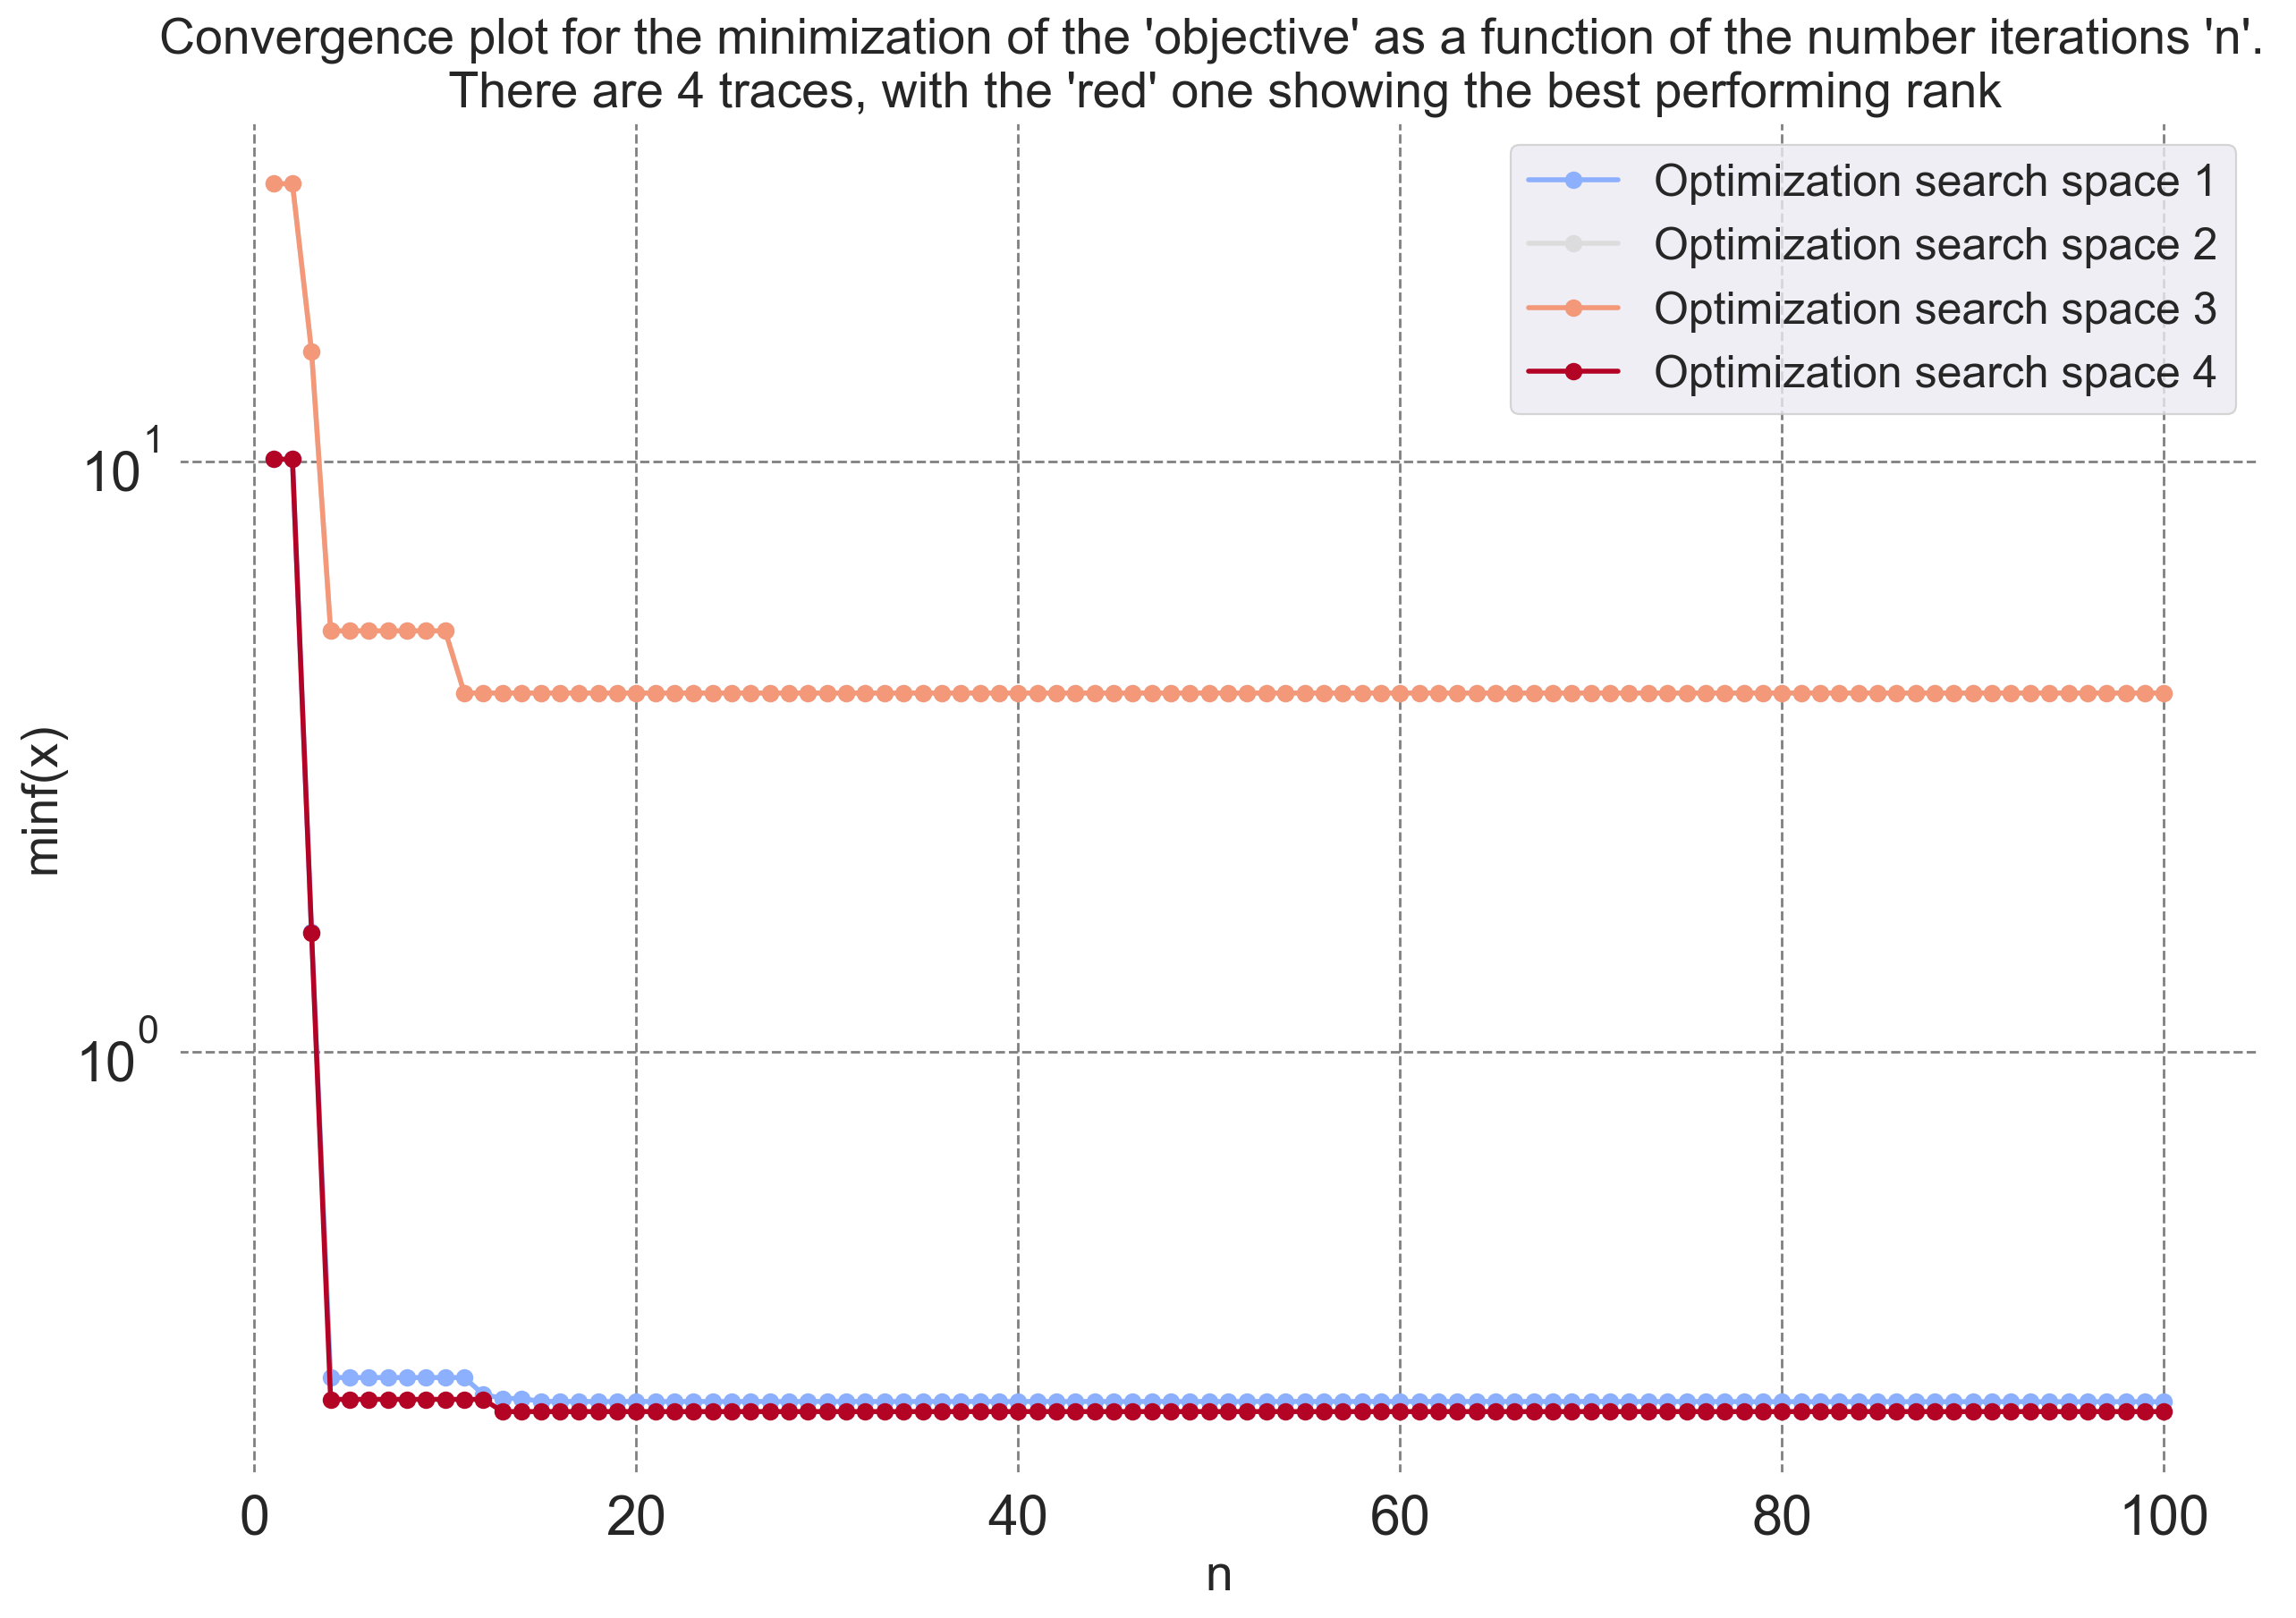

In [12]:
fig, ax = plot_convergence(results_alcohol[0], results_alcohol[1], results_alcohol[2], best_alcohol)
ax.set_facecolor('white')
ax.set_title("Convergence plot for the minimization of the 'objective' as a function of the number iterations 'n'. \n There are 4 traces, with the 'red' one showing the best performing rank", loc='center', fontsize=20)
ax.set_xlabel("n", fontsize=20)
ax.set_ylabel("minf(x)", fontsize=20)
ax.set_yscale("log")
ax.grid(True, color='grey', linestyle='--', linewidth=1)
ax.legend(['Optimization search space 1', 'Optimization search space 2', 'Optimization search space 3', 'Optimization search space 4'], prop={'size': 18})

**It is worth noting that the search spaces are continuous. Therefore, there is an automatic improvement over the discrete brute force (Grid Search) solution provided before**